# Introduction

All data is taken from the site https://sofifa.com/?col=wg&sort=desc

In [1]:
cd Desktop

C:\Users\VM\Desktop


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('fifa_players.csv', low_memory=False)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,6,11,15,14,8,NaN,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,15,6,12,8,10,NaN,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,7,11,15,14,11,NaN,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,9,9,15,15,11,NaN,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,15,13,5,10,13,NaN,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


# Analytics of ratings

In [3]:
top_100_by_rating = df.sort_values(by='overall', ascending=False)[['short_name', 'overall']].head(100)
top_100_by_rating 

,short_name,overall
0,L. Messi,93
1,R. Lewandowski,92
2,Cristiano Ronaldo,91
3,Neymar Jr,91
4,K. De Bruyne,91
...,...,...
80,K. Walker,85
81,P. Aubameyang,85
130,J. Giménez,84
120,Felipe,84


In [4]:
top_100_by_wage = df.sort_values(by='wage_eur', ascending=False)[['short_name', 'overall', 'wage_eur']].head(100)
common_players = pd.merge(top_100_by_rating, top_100_by_wage, on='short_name')
common_players

,short_name,overall_x,overall_y,wage_eur
0,L. Messi,93,93,320000.0
1,R. Lewandowski,92,92,270000.0
2,Cristiano Ronaldo,91,91,270000.0
3,Neymar Jr,91,91,270000.0
4,K. De Bruyne,91,91,350000.0
...,...,...,...,...
61,E. Hazard,85,85,240000.0
62,E. Cavani,85,85,190000.0
63,İ. Gündoğan,85,85,185000.0
64,K. Walker,85,85,170000.0


In [5]:
top_30_goalkeepers = df[df['player_positions'].str.contains('GK')].sort_values(by='overall', ascending=False).head(30)
top_30_goalkeepers

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,87,92,78,90,90,50.0,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,NaN,https://cdn.sofifa.net/flags/si.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,88,85,88,88,90,43.0,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,NaN,https://cdn.sofifa.net/flags/de.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,88,88,91,89,88,56.0,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
12,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,GK,89,91,85500000.0,250000.0,29,...,84,89,74,86,88,46.0,https://cdn.sofifa.net/players/192/119/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
18,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,GK,89,91,94000000.0,200000.0,27,...,87,82,93,88,88,64.0,https://cdn.sofifa.net/players/210/257/22_120.png,https://cdn.sofifa.net/teams/10/60.png,NaN,https://cdn.sofifa.net/flags/br.png
20,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,GK,89,90,82000000.0,190000.0,28,...,86,86,84,90,89,52.0,https://cdn.sofifa.net/players/212/831/22_120.png,https://cdn.sofifa.net/teams/9/60.png,NaN,https://cdn.sofifa.net/flags/br.png
21,230621,https://sofifa.com/player/230621/gianluigi-don...,G. Donnarumma,Gianluigi Donnarumma,GK,89,93,119500000.0,110000.0,22,...,91,83,79,85,90,52.0,https://cdn.sofifa.net/players/230/621/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1343/60.png,https://cdn.sofifa.net/flags/it.png
26,193041,https://sofifa.com/player/193041/keylor-navas/...,K. Navas,Keylor Navas Gamboa,GK,88,88,15500000.0,130000.0,34,...,89,84,75,87,89,54.0,https://cdn.sofifa.net/players/193/041/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/cr.png
31,167948,https://sofifa.com/player/167948/hugo-lloris/2...,H. Lloris,Hugo Lloris,GK,87,87,13500000.0,125000.0,34,...,88,83,65,84,90,61.0,https://cdn.sofifa.net/players/167/948/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
34,186153,https://sofifa.com/player/186153/wojciech-szcz...,W. Szczęsny,Wojciech Tomasz Szczęsny,GK,87,87,42000000.0,105000.0,31,...,86,82,73,87,88,49.0,https://cdn.sofifa.net/players/186/153/22_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [6]:
top_30_teams_by_rating = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(30)
top_30_teams_by_rating

club_name
Juventus                  79.961538
Paris Saint-Germain       79.454545
Inter                     78.857143
FC Bayern München         78.071429
Manchester United         78.000000
Real Madrid CF            77.757576
Napoli                    77.500000
Atalanta                  77.480000
Real Sociedad             77.280000
SL Benfica                76.931034
Manchester City           76.906250
FC Barcelona              76.787879
Atlético de Madrid        76.718750
AC Milan                  76.714286
Chelsea                   76.363636
FC Porto                  76.153846
Liverpool                 75.969697
Sevilla FC                75.848485
Borussia Dortmund         75.677419
Sporting CP               75.480000
Flamengo                  75.400000
Real Betis Balompié       75.121212
AS Monaco                 75.111111
Leicester City            75.000000
Bayer 04 Leverkusen       74.888889
Villarreal CF             74.878788
Lazio                     74.781250
Clube Atlético Min

In [7]:
top_leagues_by_dribbling = df.groupby('league_name')['dribbling'].mean().sort_values(ascending=False)
top_leagues_by_dribbling

league_name
Italian Serie A                         69.637624
Spain Primera Division                  69.421517
Czech Republic Gambrinus Liga           69.385714
English Premier League                  69.125000
German 1. Bundesliga                    68.362705
French Ligue 1                          68.067194
Greek Super League                      67.549020
Ukrainian Premier League                66.920000
Campeonato Brasileiro Série A           66.555556
Russian Premier League                  66.478873
Turkish Süper Lig                       65.933747
Portuguese Liga ZON SAGRES              65.682927
Croatian Prva HNL                       64.857143
Argentina Primera División              64.781874
Holland Eredivisie                      64.752941
Hungarian Nemzeti Bajnokság I           64.440000
Belgian Jupiler Pro League              64.277778
Mexican Liga MX                         64.020595
South African Premier Division          63.916667
Spanish Segunda División              

In [8]:
position_counts = {'GK': 1, 'CB': 4, 'LB': 4, 'RB': 4, 'CM': 4, 'ST': 2}

def get_team_average_rating(team):
    players = df[df['club_name'] == team]
    total_selected = 0
    total_rating = 0
    
    for position, count in position_counts.items():
        selected = players[players['player_positions'].str.contains(position)].nlargest(count, 'overall')
        total_selected += len(selected)
        total_rating += selected['overall'].sum()
    
    return total_rating / total_selected if total_selected == sum(position_counts.values()) else None

ratings = {team: get_team_average_rating(team) for team in df['club_name'].unique()}

top_30_teams = pd.DataFrame(ratings.items(), columns=['Team', 'Average Rating']).dropna().sort_values(by='Average Rating', ascending=False).head(30)
top_30_teams

,Team,Average Rating
8,Real Madrid CF,82.157895
0,Paris Saint-Germain,81.842105
21,RB Leipzig,79.052632
14,Villarreal CF,79.000000
22,Arsenal,78.684211
6,Tottenham Hotspur,78.157895
42,Valencia CF,76.894737
76,Granada CF,76.789474
25,Ajax,76.210526
43,TSG Hoffenheim,75.894737


# Visualisation

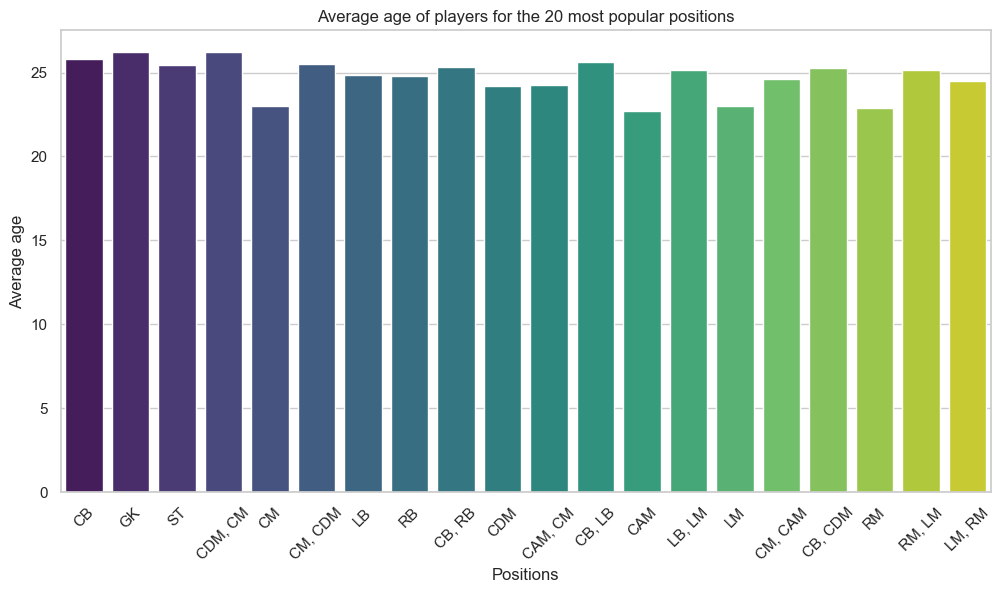

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

position_counts = df['player_positions'].value_counts()
average_age_per_position = df.groupby('player_positions')['age']. mean()
position_stats = pd.DataFrame({
    'count': position_counts,
    'average_age': average_age_per_position
}).reset_index().rename(columns={'index': 'position', 'player_positions': 'position'})

top_20_positions = position_stats.nlargest(20, 'count')

plt.figure(figsize=(12, 6))
sns.barplot(x='position', y='average_age', data=top_20_positions, palette='viridis')
plt.title('Average age of players for the 20 most popular positions')
plt.xticks(rotation=45)
plt.xlabel('Positions')
plt.ylabel('Average age')
plt.show()

C:\Users\VM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


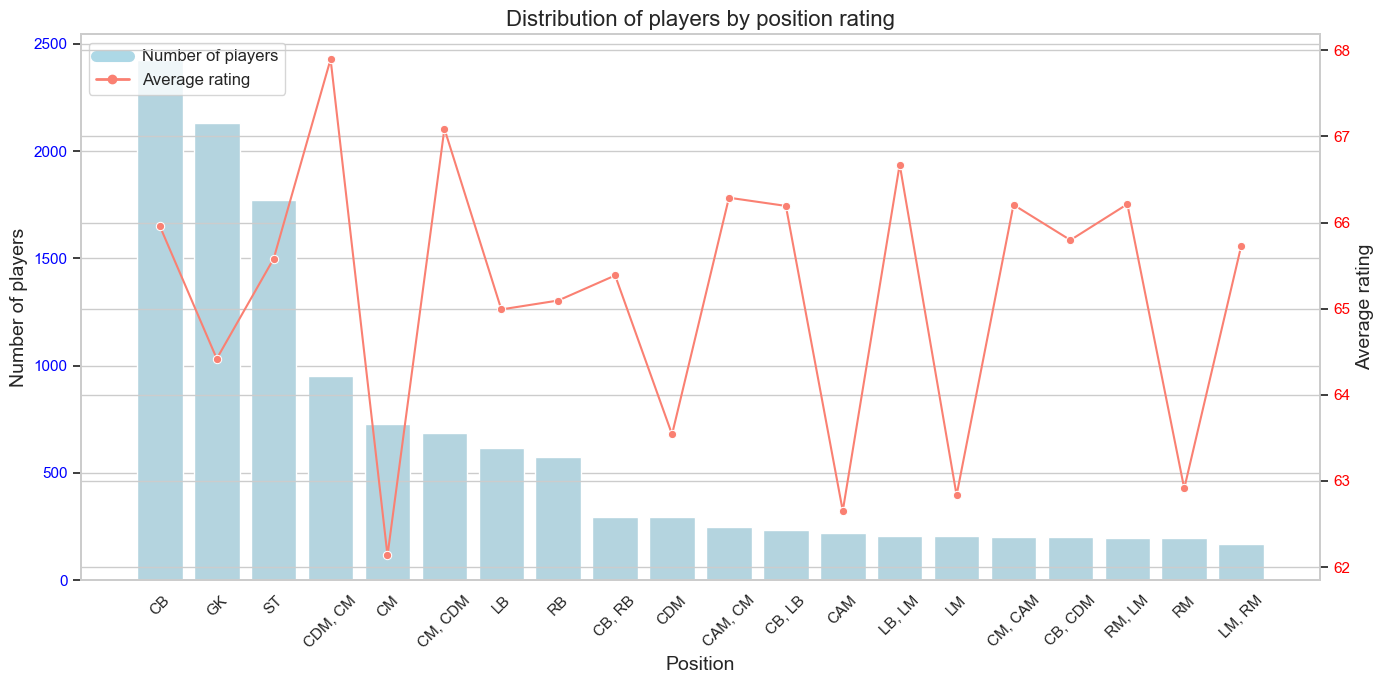

In [11]:
position_count = df['player_positions'].value_counts()
average_rating_per_position = df.groupby('player_positions')['overall'].mean()
position_stats = pd.DataFrame({
    'position': position_counts.index,
    'count': position_counts.values,
    'average_rating': average_rating_per_position.reindex(position_counts.index).values
})

top_20_positions = position_stats.nlargest(20, 'count')

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.barplot(data=top_20_positions, x='position', y='count', color='lightblue', ax=ax1)
ax1.set_xlabel('Position', fontsize=14)
ax1.set_ylabel('Number of players', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=top_20_positions, x='position', y='average_rating', color='salmon', marker='o', ax=ax2)
ax2.set_ylabel('Average rating', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

custom_lines = [
    plt.Line2D([0], [0], color='lightblue', lw=8, label='Number of players'),
    plt.Line2D([0], [0], color='salmon', lw=2, marker='o', label='Average rating')
]
ax1.legend(handles=custom_lines, loc='upper left', fontsize=12)

plt.title('Distribution of players by position rating', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.show()

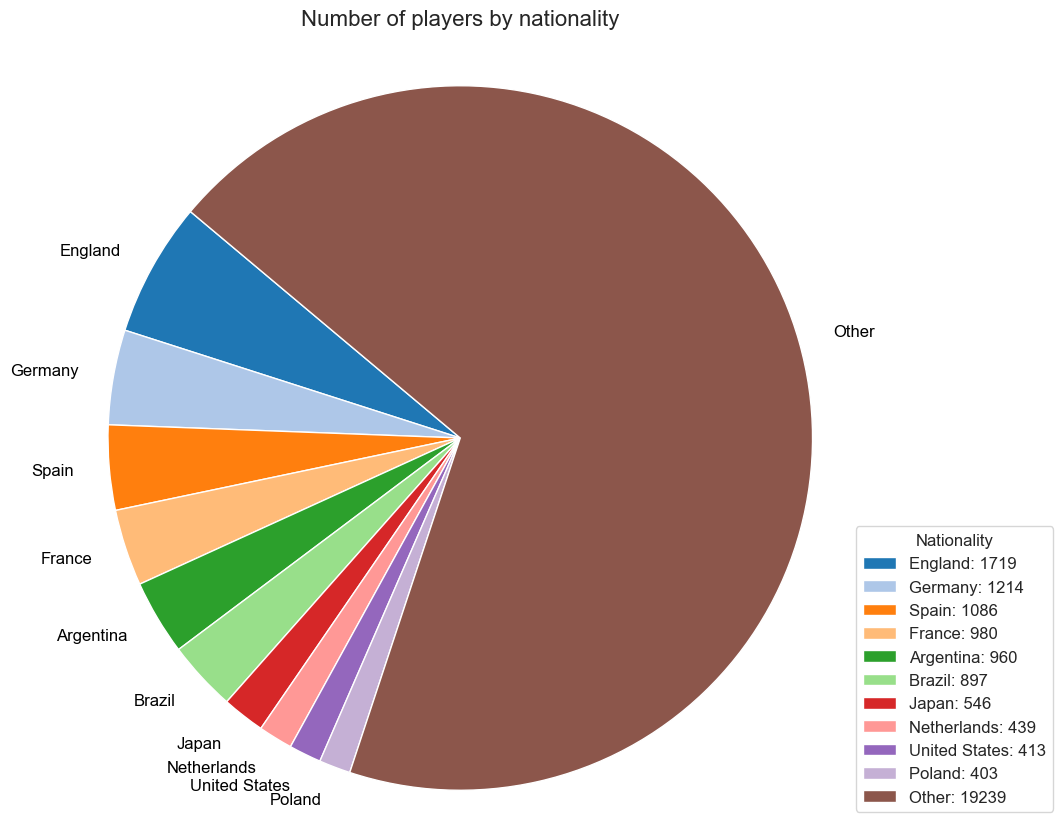

In [13]:
from matplotlib import cm

nationality_counts = df['nationality_name'].value_counts()
top_nationalities = nationality_counts.head(10)
other_count = nationality_counts.iloc[:].sum()
top_nationalities['Other'] = other_count

colors = cm.tab20.colors[:len(top_nationalities)]  

plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    top_nationalities,
    labels=top_nationalities.index,
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}  
)

plt.legend(
    wedges,
    [f'{label}: {count}' for label, count in zip(top_nationalities.index, top_nationalities.values)],
    title="Nationality",
    loc="center left",
    bbox_to_anchor=(1, -0.3, 0.5, 1),
    fontsize=12
)

plt.axis('equal')
plt.title('Number of players by nationality', fontsize=16, pad=20)
plt.show()

# Methodology

The most important skills for evaluating a penalty taker: penalty accuracy (mentality_penalties), shot power (power_shot_power), finishing attacks (attacking_finishing), composure (mentality_composure), which are correlated as 0.4:0.2:0.2:0.2.

The most important skills for evaluating a goalkeeper who saves penalties: reflexes (goalkeeping_reflexes), diving to intercept the ball (goalkeeping_diving), ball possession (goalkeeping_handling), which are correlated as 0.5:0.3:0.2.

Significance of the difference in performance between penalty takers and goalkeepers in clubs: the difference between the ratings of goalkeepers and penalty takers, which shows how much stronger goalkeepers are compared to the team's penalty takers.

In [14]:
df['goalkeeper_rating'] = (
    df['goalkeeping_diving'] * 0.3 + 
    df['goalkeeping_handling'] * 0.2 + 
    df['goalkeeping_kicking'] * 0.2 + 
    df['goalkeeping_positioning'] * 0.2 + 
    df['goalkeeping_reflexes'] * 0.5
)

df['penalty_rating'] = (
    df['mentality_penalties'] * 0.4 + 
    df['power_shot_power'] * 0.2 + 
    df['attacking_finishing'] * 0.2 + 
    df['mentality_composure'] * 0.2
)

df['rating_difference'] = df['goalkeeper_rating'] - df['penalty_rating']

top_goalkeepers = df.groupby('club_name')['goalkeeper_rating'].mean().sort_values(ascending=False).reset_index()
print("Top 10 clubs with the best goalkeepers:")
print(top_goalkeepers.head(10))

top_penalty_takers = df.groupby('club_name')['penalty_rating'].mean().sort_values(ascending=False).reset_index()
print("Top 10 clubs with the best penalty takers:")
print(top_penalty_takers.head(10))

Top 10 clubs with the best goalkeepers:
           club_name  goalkeeper_rating
0      Kaizer Chiefs          29.160714
1         AZ Alkmaar          28.561538
2                PSV          28.400000
3          Feyenoord          28.046429
4               Ajax          27.948276
5     Spartak Moskva          27.942857
6        Sporting CP          27.924000
7  Stade Brestois 29          27.665385
8   Newcastle United          27.645455
9  Atlético Nacional          27.621739
Top 10 clubs with the best penalty takers:
             club_name  penalty_rating
0       Real Madrid CF       64.115152
1             Juventus       63.946154
2    Manchester United       63.303030
3  Paris Saint-Germain       62.939394
4           SL Benfica       62.234483
5               Napoli       62.161538
6      Manchester City       62.125000
7                Inter       61.700000
8        RB Bragantino       61.130000
9          River Plate       61.042857


# Business analysis

1. The distribution of players by age and position can be useful for football clubs. Clubs can optimize their recruitment and development strategies. For example, it is possible to identify positions where younger players need to be recruited
2. The distribution of players by position rating can be useful for scouts and coaches It is possible to identify which positions are played by the best players and which positions are undervalued. This can help in determining the value of players for potential transfers or selection of training programs.
3. The distribution of nationalities by rating can be useful for international clubs and brands. It is possible to identify which countries produce the best players and optimize the global marketing strategy. For example, brands can target sponsorship offers and campaigns to certain countries.

Thus, based on the analyses already made and their visualizations, our potential clients are:
1) Football clubs (understanding the market and making effective transfer decisions);
2) Sports agencies (assessing the value of players based on age, rating and nationality);
3) Brands (analyzing the global market, planning advertising campaigns and working with athletes);
4) Marketing agencies (understanding the geographical areas of influence by athlete nationality).

# EDA

In [13]:
def EDA(df):
    total_na = df.isna().sum().sum()
    print('Dimensions:', df.shape[0], '- rows,', df.shape[1], '- columns')
    print('Total NA\'s:', total_na)
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))

    col_name = df.columns
    dtypes = df.dtypes
    uniq = df.nunique()
    na_val = df.isna().sum()
    for i in range (len(df.columns)):
        print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

EDA(df)

Dimensions: 19239 - rows, 83 - columns
Total NA's: 152557
                           Column Name  Data Type     Count Distinct  NA Values
                             sofifa_id      int64          19239          0
                            player_url     object          19239          0
                            short_name     object          18145          0
                             long_name     object          19219          0
                      player_positions     object            674          0
                               overall      int64             47          0
                             potential      int64             46          0
                             value_eur    float64            252         74
                              wage_eur    float64            133         61
                                   age      int64             29          0
                                   dob     object           6312          0
                          

C:\Users\VM\AppData\Local\Temp\ipykernel_11816\1814325443.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))


# Feature engineering

In [14]:
df = df[['short_name', 'player_positions', 'overall', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',     
         'club_name', 'league_name', 'league_level', 'club_loaned_from', 'club_joined', 'club_jersey_number', 'club_contract_valid_until',
         'nationality_name','nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
         'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 
         'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing', 
         'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_agility',
         'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
         'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
         'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 
         'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [15]:
position_dummies = df['player_positions'].str.get_dummies(sep=', ')

if 'SUB' in position_dummies.columns:
    position_dummies.drop('SUB', axis=1, inplace=True)
if 'RES' in position_dummies.columns:
    position_dummies.drop('RES', axis=1, inplace=True)

Y = position_dummies

X = df.drop('player_positions', axis=1)

In [16]:
X = X.drop(['club_position', 'nation_position'], axis=1)
X.isnull().sum()[X.isnull().sum()>0]

value_eur                       74
wage_eur                        61
club_team_id                    61
club_name                       61
league_name                     61
league_level                    61
club_loaned_from             18137
club_joined                   1163
club_jersey_number              61
club_contract_valid_until       61
nation_team_id               18480
nation_jersey_number         18480
release_clause_eur            1176
player_tags                  17798
player_traits                 9841
pace                          2132
shooting                      2132
passing                       2132
dribbling                     2132
defending                     2132
physic                        2132
goalkeeping_speed            17107
dtype: int64

In [17]:
X = X.drop(['short_name', 'club_name', 'league_name', 'club_joined', 'nationality_name', 'club_contract_valid_until', 'club_team_id', 
            'club_loaned_from', 'nation_team_id', 'nation_jersey_number', 'player_tags', 'player_traits'], axis=1)

In [18]:
goalkeeper_columns = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
field_players_with_gk_attributes = df[(df['player_positions'] != 'GK') & (
    (df['goalkeeping_diving'] > 0) |
    (df['goalkeeping_handling'] > 0) |
    (df['goalkeeping_kicking'] > 0) |
    (df['goalkeeping_positioning'] > 0) |
    (df['goalkeeping_reflexes'] > 0)
)]

field_player_columns = ['dribbling', 'passing', 'shooting', 'pace', 'defending', 'physical']
goalkeepers_with_field_attributes = df[(df['player_positions'] == 'GK') & (
    (df['dribbling'] > 0) |
    (df['passing'] > 0) |
    (df['shooting'] > 0) |
    (df['pace'] > 0) |
    (df['defending'] > 0) |
    (df['physic'] > 0)
)]

print("\nПроблеми з польовими гравцями:\n", field_players_with_gk_attributes[['short_name', 'player_positions', 'goalkeeping_diving', 'goalkeeping_handling']])
print("\nПроблеми з воротарями:\n", goalkeepers_with_field_attributes[['short_name', 'player_positions', 'dribbling', 'passing', 'shooting']])


Проблеми з польовими гравцями:
                short_name player_positions  goalkeeping_diving  \
0                L. Messi       RW, ST, CF                   6   
1          R. Lewandowski               ST                  15   
2       Cristiano Ronaldo           ST, LW                   7   
3               Neymar Jr          LW, CAM                   9   
4            K. De Bruyne          CM, CAM                  15   
...                   ...              ...                 ...   
19234           Song Defu              CDM                   6   
19235           C. Porter               CM                  11   
19236            N. Logue               CM                   8   
19237           L. Rudden               ST                   7   
19238  E. Lalchhanchhuaha              CAM                   8   

       goalkeeping_handling  
0                        11  
1                         6  
2                        11  
3                         9  
4                       

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   value_eur                    19165 non-null  float64
 2   wage_eur                     19178 non-null  float64
 3   age                          19239 non-null  int64  
 4   height_cm                    19239 non-null  int64  
 5   weight_kg                    19239 non-null  int64  
 6   league_level                 19178 non-null  float64
 7   club_jersey_number           19178 non-null  float64
 8   preferred_foot               19239 non-null  object 
 9   weak_foot                    19239 non-null  int64  
 10  skill_moves                  19239 non-null  int64  
 11  international_reputation     19239 non-null  int64  
 12  work_rate                    19239 non-null  object 
 13  body_type       

In [20]:
print(X['body_type'].unique())

['Unique' 'Normal (170-185)' 'Lean (170-185)' 'Normal (185+)'
 'Lean (185+)' 'Normal (170-)' 'Stocky (185+)' 'Lean (170-)'
 'Stocky (170-185)' 'Stocky (170-)']


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X['body_type'] = label_encoder.fit_transform(X['body_type'])

body_type_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(body_type_mapping)

{0: 'Lean (170-)', 1: 'Lean (170-185)', 2: 'Lean (185+)', 3: 'Normal (170-)', 4: 'Normal (170-185)', 5: 'Normal (185+)', 6: 'Stocky (170-)', 7: 'Stocky (170-185)', 8: 'Stocky (185+)', 9: 'Unique'}


In [22]:
left_work_rate = []
right_work_rate = []

for index, row in X.iterrows():
    wr = row['work_rate'].split('/')
    left_work_rate.append(wr[0])
    right_work_rate.append(wr[1])

X = X.drop('work_rate', axis = 1)
wr_dict = {
    'Low':0,
    'Medium':1,
    'High':2
}

X['left_work_rate'] = left_work_rate
X['right_work_rate'] = right_work_rate

X['left_work_rate'] = X['left_work_rate'].map(wr_dict)
X['right_work_rate'] = X['right_work_rate'].map(wr_dict)

In [23]:
X['preferred_foot'] = X['preferred_foot'].map({'Right':0, 'Left':1})

In [24]:
X['league_level'] = X['league_level'].fillna(X['league_level'].mode()[0])
X['club_jersey_number'] = X['club_jersey_number'].fillna(X['club_jersey_number'].mode()[0])

X['release_clause_eur'] = pd.Series(np.log(X['release_clause_eur'])).fillna(X['release_clause_eur'].mean())
X['value_eur'] = pd.Series(np.log(X['value_eur'])).fillna(X['value_eur'].mean())
X['wage_eur'] = pd.Series(np.log(X['wage_eur'])).fillna(X['wage_eur'].mean())

X['pace'] = X['pace'].fillna(0)
X['shooting'] = X['shooting'].fillna(0)
X['passing'] = X['passing'].fillna(0)
X['dribbling'] = X['dribbling'].fillna(0)
X['defending'] = X['defending'].fillna(0)
X['physic'] = X['physic'].fillna(0)
X['goalkeeping_speed'] = X['goalkeeping_speed'].fillna(0)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

# Feature Selection and Training of Models

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

model = MultiOutputClassifier(RandomForestClassifier(n_estimators=300, max_depth=7))
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                       n_estimators=300))

In [27]:
weight_per_feature = {key: [] for key in model.estimators_[0].feature_names_in_}

for estimator in model.estimators_:
    for i in range(len(estimator.feature_names_in_)):
        weight_per_feature[estimator.feature_names_in_[i]].append(estimator.feature_importances_[i])

print(weight_per_feature)

{'overall': [0.00987057700669517, 0.001873724431142412, 0.009729145399107873, 0.010451409317297369, 0.02354343750704388, 0.0, 0.0033932361955057626, 0.005134521608341037, 0.008251862870281072, 0.006651467001211268, 0.0027233695929759815, 0.005633267324841083, 0.00784188602454928, 0.009736741286910147, 0.0024248925044354484], 'value_eur': [0.005860316727677364, 0.0018498413297826839, 0.004869256073475534, 0.013005317284600231, 0.00773902606487274, 0.0, 0.0035264864917096466, 0.00578610484533786, 0.010420421906865068, 0.009440435880531646, 0.0032800155241001694, 0.007160022353038735, 0.009132050798210337, 0.01163254462010305, 0.0016219733061256976], 'wage_eur': [0.0049681682313917445, 0.0012185799438183599, 0.0041447027687799365, 0.010247482387624893, 0.0042758045516948385, 0.0, 0.0017392573060404817, 0.0047817145830792015, 0.007770635678851365, 0.008960054296614598, 0.0024495135818700807, 0.0041582864191830006, 0.008263055323524823, 0.009399875859025677, 0.0009514040285511086], 'age': [

<function matplotlib.pyplot.show(close=None, block=None)>

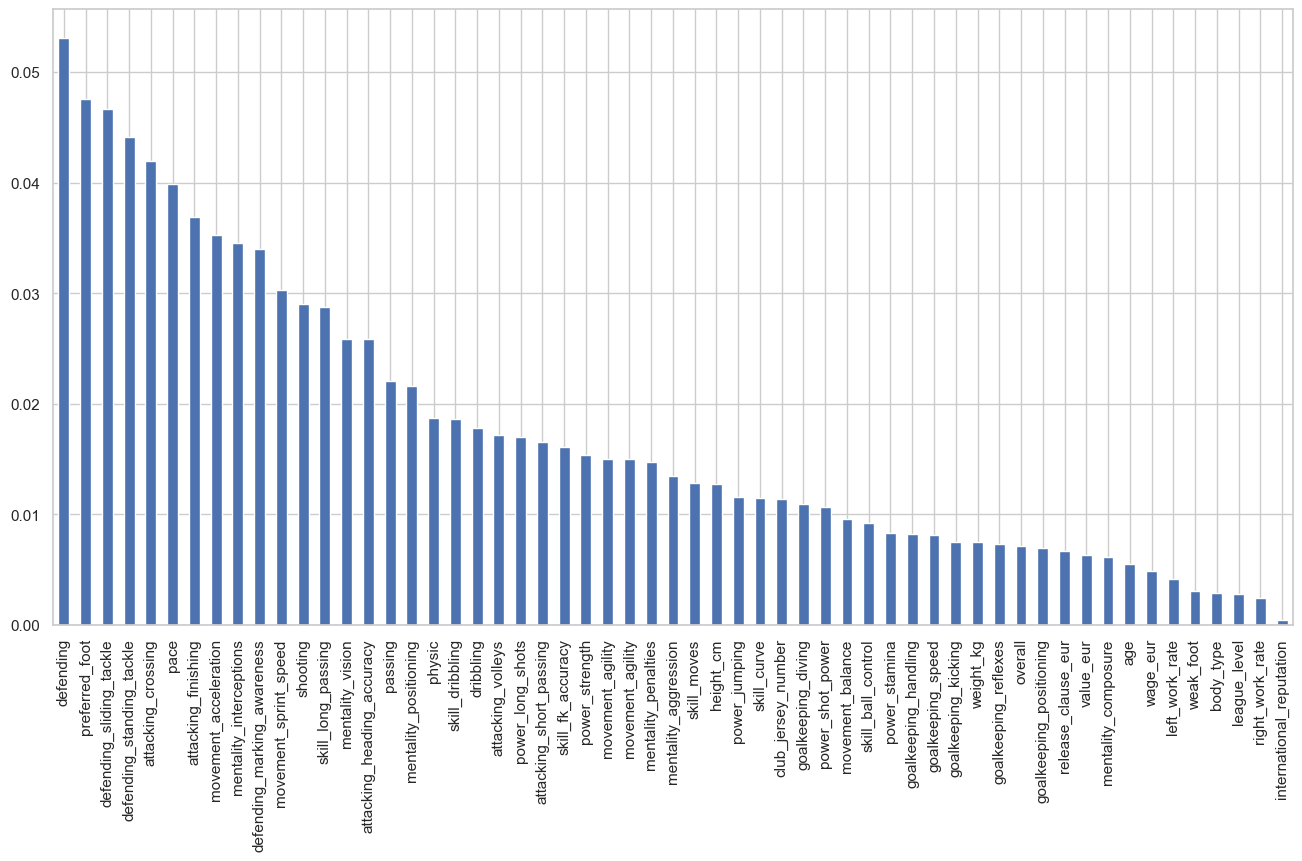

In [28]:
mean_weight_per_feature = pd.Series([np.mean(weight_per_feature[key]) for key in X.columns], index = X.columns)

mean_weight_per_feature = mean_weight_per_feature.sort_values(ascending=False)
mean_weight_per_feature.plot.bar(figsize=(16,8))
plt.show

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = MultiOutputClassifier(XGBClassifier(seed=0))
score = cross_val_score(model, X[mean_weight_per_feature.iloc[:20].index.to_numpy()], Y, cv=8, scoring='accuracy', n_jobs=4)

In [38]:
for i in range (0, 15):
    model = XGBClassifier(seed=0)
    score = score = cross_val_score(model, X[mean_weight_per_feature.iloc[:20].index.to_numpy()], Y.iloc[:, i], cv=8, scoring='accuracy', n_jobs=4)
    print("Mean score for", Y.columns[i], np.mean(score))

Mean score for CAM 0.8799839404872682
Mean score for CB 0.9339853276417336
Mean score for CDM 0.9027473701142587
Mean score for CF 0.954884444152331
Mean score for CM 0.8963016637205489
Mean score for GK 0.9997400166389351
Mean score for LB 0.9480730530543342
Mean score for LM 0.8618956711094814
Mean score for LW 0.9197993814882335
Mean score for LWB 0.9711005522673576
Mean score for RB 0.9449538148477417
Mean score for RM 0.8686005609154528
Mean score for RW 0.9293627261909292
Mean score for RWB 0.969853259121146
Mean score for ST 0.9432390056766097


# Visualisation of Accuracy

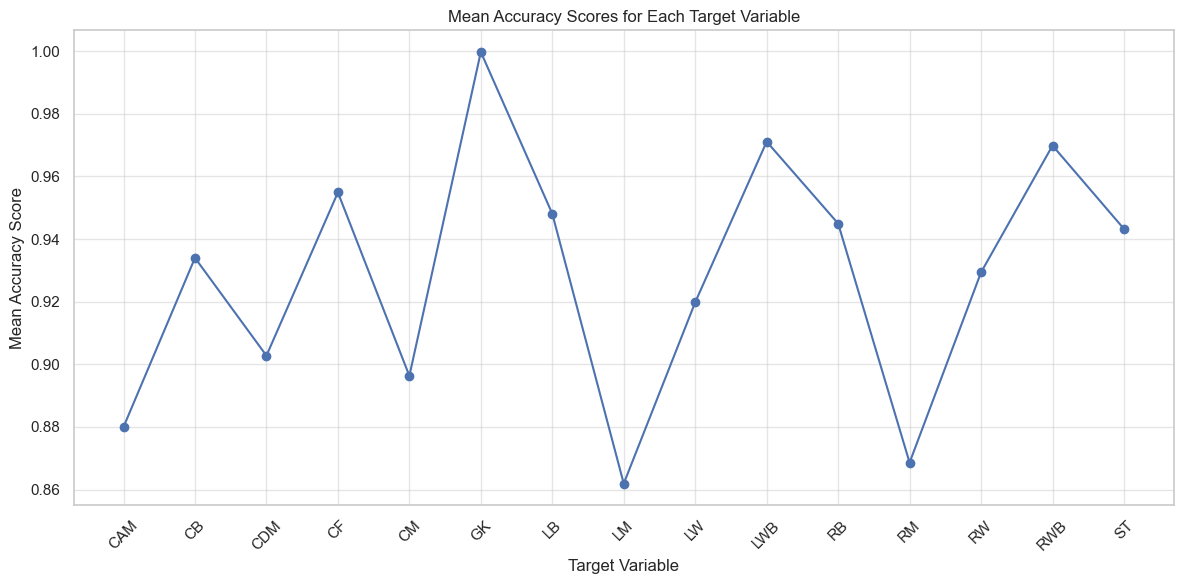

In [33]:
mean_scores = []

for i in range(0, 15):
    model = XGBClassifier(seed=0)
    scores = cross_val_score(
        model,
        X[mean_weight_per_feature.iloc[:20].index.to_numpy()],
        Y.iloc[:, i],
        cv=8,
        scoring='accuracy',
        n_jobs=4
    )
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

plt.figure(figsize=(12, 6))
plt.plot(Y.columns[:15], mean_scores, marker='o', linestyle='-', color='b')
plt.title("Mean Accuracy Scores for Each Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Mean Accuracy Score")
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()